<a href="https://colab.research.google.com/github/fc0712/DSBA-project-Airbnb_LA/blob/master/Data%20Cleaning%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing and Overview of Data




In [1]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install --quiet pyplot-themes
import pyplot_themes as themes
themes.theme_minimal(grid=False,palette=themes.palettes.Diverging.bluepurple)


In [2]:
#loading the listings data
data_listings = pd.read_csv('http://data.insideairbnb.com/united-states/ca/los-angeles/2020-10-09/data/listings.csv.gz')
data_listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,20201009145904,2020-10-25,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...",NaN,https://a0.muscache.com/pictures/4321499/1da98...,521,https://www.airbnb.com/users/show/521,Paolo,2008-06-27,"San Francisco, California, United States","Paolo Privitera, CEO Evensi\n\nPaolo, MIT MBA ...",NaN,NaN,0%,f,https://a0.muscache.com/im/pictures/user/e704a...,https://a0.muscache.com/im/pictures/user/e704a...,Culver City,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,NaN,Culver City,Other Cities,33.98209,-118.38494,Entire condominium,Entire home/apt,6,NaN,2 baths,2.0,3.0,"[""TV"", ""Heating"", ""Cable TV"", ""Kitchen"", ""Sham...",$115.00,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,0,0,0,207,2020-10-25,2,0,0,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,NaN,f,1,1,0,0,0.02
1,2708,https://www.airbnb.com/rooms/2708,20201009145904,2020-10-10,Beautiful Furnish Mirrored Mini-Suite w/ Firep...,Beautiful Furnished Mirror Mini-Suite w/ Firep...,We are minutes away from the Mentor Language I...,https://a0.muscache.com/pictures/miso/Hosting-...,3008,https://www.airbnb.com/users/show/3008,Chas.,2008-09-16,"Los Angeles, California, United States",Writer.\r\nLiterary Manager.\r\nPhotographer.\...,within a few hours,100%,100%,t,https://a0.muscache.com/im/pictures/user/d17cf...,https://a0.muscache.com/im/pictures/user/d17cf...,Hollywood,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Los Angeles, California, United States",Hollywood,City of Los Angeles,34.09768,-118.34602,Private room in apartment,Private room,1,NaN,1.5 baths,1.0,1.0,"[""Bed linens"", ""Essentials"", ""Patio or balcony...",$75.00,30,366,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,0,30,60,335,2020-10-10,27,5,1,2014-06-09,2020-10-06,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,t,2,0,2,0,0.35
2,2732,https://www.airbnb.com/rooms/2732,20201009145904,2020-10-18,Zen Life at the Beach,An oasis of tranquility awaits you.<br /><br /...,"This is the best part of Santa Monica. Quiet, ...",https://a0.muscache.com/pictures/1082974/0f74c...,3041,https://www.airbnb.com/users/show/3041,Yoga Priestess,2008-09-17,"Santa Monica, California, United States",I have been teaching yoga and meditation for 3...,within an hour,92%,50%,f,https://a0.muscache.com/im/users/3041/profile_...,https://a0.muscache.com/im/users/3041/profile_...,Santa Monica,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Santa Monica, California, United States",Santa Monica,Other Cities,34.00475,-118.48127,Private room in apartment,Private room,1,NaN,1 private bath,1.0,1.0,"[""Hangers"", ""Refrigerator"", ""Dish

In [3]:
#getting an overview of attributes and data types
data_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30533 entries, 0 to 30532
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            30533 non-null  int64  
 1   listing_url                                   30533 non-null  object 
 2   scrape_id                                     30533 non-null  int64  
 3   last_scraped                                  30533 non-null  object 
 4   name                                          30531 non-null  object 
 5   description                                   29526 non-null  object 
 6   neighborhood_overview                         19960 non-null  object 
 7   picture_url                                   30533 non-null  object 
 8   host_id                                       30533 non-null  int64  
 9   host_url                                      30533 non-null 

## Converting price to float and removing $

In [4]:
#removing $ sign and coverting price column to float
data_listings.price = data_listings.price.str.replace(',','')
data_listings.price = data_listings.price.str.replace('$','')
data_listings.price = data_listings.price.astype(float)

In [5]:
data_listings['price']

0        115.0
1         75.0
2        155.0
3         50.0
4         70.0
         ...  
30528     69.0
30529     34.0
30530    200.0
30531    241.0
30532    165.0
Name: price, Length: 30533, dtype: float64

# NA values

In [6]:
#Creating get_na_columns function
def get_na_columns (df):
  listings_na_temp = df.isna().sum().sort_values(ascending=False)
  listings_na_temp = listings_na_temp[listings_na_temp > 0]
  return listings_na_temp

get_na_columns(data_listings)

bathrooms                      30533
calendar_updated               30533
license                        24484
host_about                     11485
neighborhood_overview          10573
neighbourhood                  10572
host_response_time              8070
host_response_rate              8070
review_scores_value             7249
review_scores_location          7245
review_scores_checkin           7242
review_scores_communication     7234
review_scores_cleanliness       7232
review_scores_accuracy          7232
review_scores_rating            7109
last_review                     6731
first_review                    6731
reviews_per_month               6731
host_acceptance_rate            6189
host_neighbourhood              5951
bedrooms                        3559
description                     1007
beds                             296
host_location                     92
bathrooms_text                    29
host_listings_count               10
host_name                         10
h

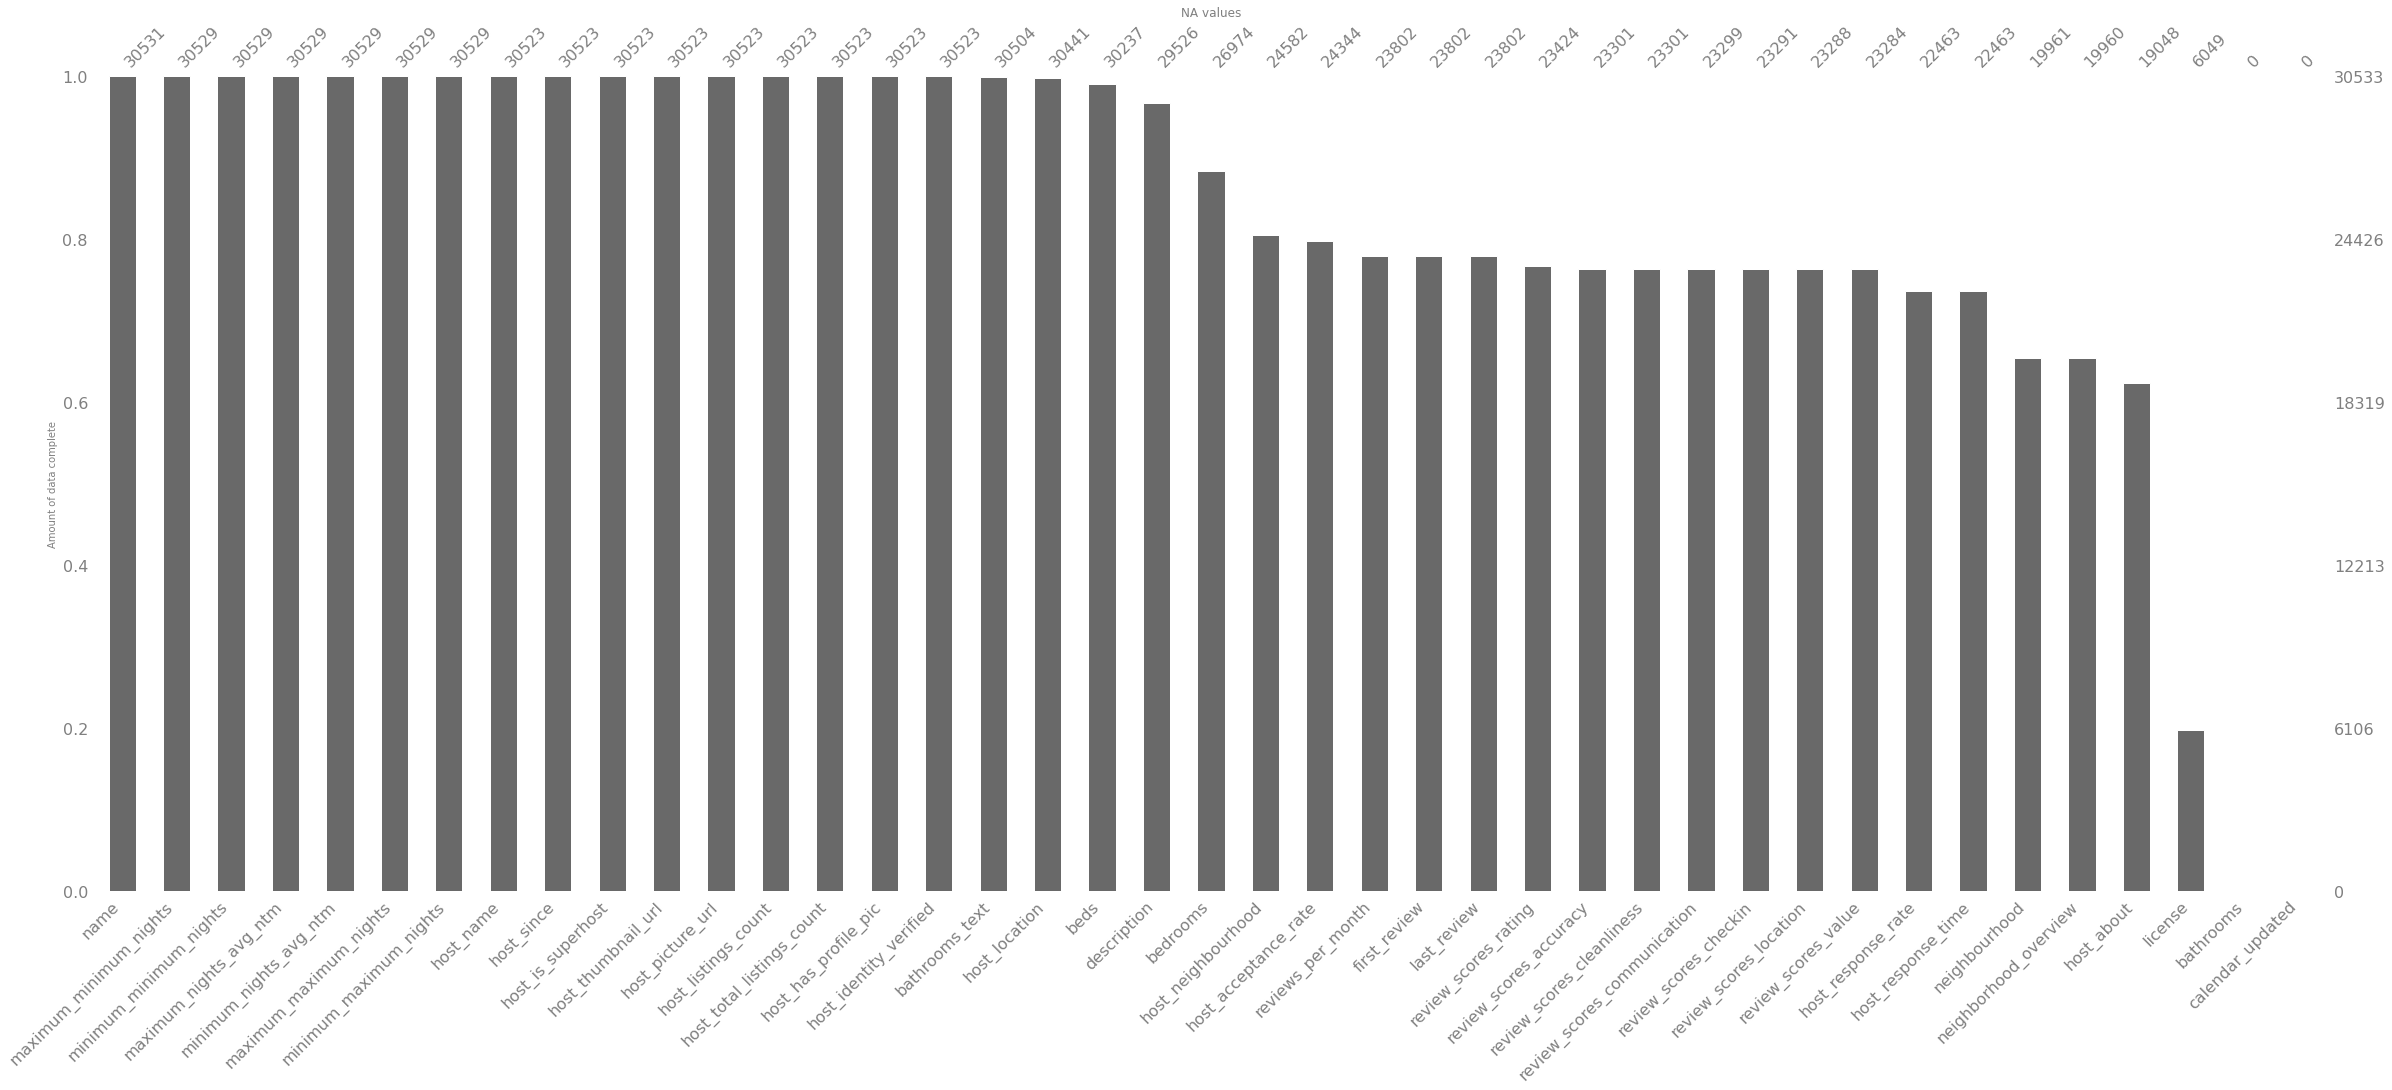

In [7]:
import missingno as msno
fig,ax = plt.subplots(figsize=(40,15))
figure_no = msno.bar(data_listings,figsize=(20,30),p=0.99999999,filter="bottom",sort="descending",ax=ax)
ax.set_title("NA values")
ax.set_ylabel("Amount of data complete")
plt.savefig("figure_1.svg")
plt.show()


## Bathroom

In [8]:
#replacing NA values in bathroom column with no. of bathroom from bathrooms_text column, and adding bathroom type to bathroom text
data_listings['bathrooms'], data_listings['bathrooms_text'] = data_listings['bathrooms_text'].str.split(' ', 1).str

#renaming the bathroom_text column
dict_col = {  
    "bathrooms_text" : 'bathroom_type'
            }

data_listings.rename(columns = dict_col, inplace = True)

data_listings.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathroom_type,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,20201009145904,2020-10-25,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...",NaN,https://a0.muscache.com/pictures/4321499/1da98...,521,https://www.airbnb.com/users/show/521,Paolo,2008-06-27,"San Francisco, California, United States","Paolo Privitera, CEO Evensi\n\nPaolo, MIT MBA ...",NaN,NaN,0%,f,https://a0.muscache.com/im/pictures/user/e704a...,https://a0.muscache.com/im/pictures/user/e704a...,Culver City,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,NaN,Culver City,Other Cities,33.98209,-118.38494,Entire condominium,Entire home/apt,6,2,baths,2.0,3.0,"[""TV"", ""Heating"", ""Cable TV"", ""Kitchen"", ""Sham...",115.0,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,0,0,0,207,2020-10-25,2,0,0,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,NaN,f,1,1,0,0,0.02
1,2708,https://www.airbnb.com/rooms/2708,20201009145904,2020-10-10,Beautiful Furnish Mirrored Mini-Suite w/ Firep...,Beautiful Furnished Mirror Mini-Suite w/ Firep...,We are minutes away from the Mentor Language I...,https://a0.muscache.com/pictures/miso/Hosting-...,3008,https://www.airbnb.com/users/show/3008,Chas.,2008-09-16,"Los Angeles, California, United States",Writer.\r\nLiterary Manager.\r\nPhotographer.\...,within a few hours,100%,100%,t,https://a0.muscache.com/im/pictures/user/d17cf...,https://a0.muscache.com/im/pictures/user/d17cf...,Hollywood,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Los Angeles, California, United States",Hollywood,City of Los Angeles,34.09768,-118.34602,Private room in apartment,Private room,1,1.5,baths,1.0,1.0,"[""Bed linens"", ""Essentials"", ""Patio or balcony...",75.0,30,366,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,0,30,60,335,2020-10-10,27,5,1,2014-06-09,2020-10-06,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,t,2,0,2,0,0.35
2,2732,https://www.airbnb.com/rooms/2732,20201009145904,2020-10-18,Zen Life at the Beach,An oasis of tranquility awaits you.<br /><br /...,"This is the best part of Santa Monica. Quiet, ...",https://a0.muscache.com/pictures/1082974/0f74c...,3041,https://www.airbnb.com/users/show/3041,Yoga Priestess,2008-09-17,"Santa Monica, California, United States",I have been teaching yoga and meditation for 3...,within an hour,92%,50%,f,https://a0.muscache.com/im/users/3041/profile_...,https://a0.muscache.com/im/users/3041/profile_...,Santa Monica,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Santa Monica, California, United States",Santa Monica,Other Cities,34.00475,-118.48127,Private room in apartment,Private room,1,1,private bath,1.0,1.0,"[""Hangers"", ""Refrigerator"", ""Dishes and silver..."

## Dropping columns with many NA's and filling NA with "None"

**Dropping noninformative columns**

In [9]:
#dropping host_neighborhood column as information is already obtained in the host_location column

data_listings.drop(['host_neighbourhood'],  axis='columns', inplace=True)


In [10]:
#removing calendar_updated column as all values are NaN. Also removing License column, as this also has a lot of missing values (see further explaniation in report). 

data_listings.drop(['calendar_updated', 'license'],  axis='columns', inplace=True)
data_listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathroom_type,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,20201009145904,2020-10-25,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...",NaN,https://a0.muscache.com/pictures/4321499/1da98...,521,https://www.airbnb.com/users/show/521,Paolo,2008-06-27,"San Francisco, California, United States","Paolo Privitera, CEO Evensi\n\nPaolo, MIT MBA ...",NaN,NaN,0%,f,https://a0.muscache.com/im/pictures/user/e704a...,https://a0.muscache.com/im/pictures/user/e704a...,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,NaN,Culver City,Other Cities,33.98209,-118.38494,Entire condominium,Entire home/apt,6,2,baths,2.0,3.0,"[""TV"", ""Heating"", ""Cable TV"", ""Kitchen"", ""Sham...",115.0,30,730,30.0,30.0,730.0,730.0,30.0,730.0,t,0,0,0,207,2020-10-25,2,0,0,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,f,1,1,0,0,0.02
1,2708,https://www.airbnb.com/rooms/2708,20201009145904,2020-10-10,Beautiful Furnish Mirrored Mini-Suite w/ Firep...,Beautiful Furnished Mirror Mini-Suite w/ Firep...,We are minutes away from the Mentor Language I...,https://a0.muscache.com/pictures/miso/Hosting-...,3008,https://www.airbnb.com/users/show/3008,Chas.,2008-09-16,"Los Angeles, California, United States",Writer.\r\nLiterary Manager.\r\nPhotographer.\...,within a few hours,100%,100%,t,https://a0.muscache.com/im/pictures/user/d17cf...,https://a0.muscache.com/im/pictures/user/d17cf...,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Los Angeles, California, United States",Hollywood,City of Los Angeles,34.09768,-118.34602,Private room in apartment,Private room,1,1.5,baths,1.0,1.0,"[""Bed linens"", ""Essentials"", ""Patio or balcony...",75.0,30,366,30.0,30.0,1125.0,1125.0,30.0,1125.0,t,0,30,60,335,2020-10-10,27,5,1,2014-06-09,2020-10-06,97.0,10.0,10.0,10.0,10.0,10.0,10.0,t,2,0,2,0,0.35
2,2732,https://www.airbnb.com/rooms/2732,20201009145904,2020-10-18,Zen Life at the Beach,An oasis of tranquility awaits you.<br /><br /...,"This is the best part of Santa Monica. Quiet, ...",https://a0.muscache.com/pictures/1082974/0f74c...,3041,https://www.airbnb.com/users/show/3041,Yoga Priestess,2008-09-17,"Santa Monica, California, United States",I have been teaching yoga and meditation for 3...,within an hour,92%,50%,f,https://a0.muscache.com/im/users/3041/profile_...,https://a0.muscache.com/im/users/3041/profile_...,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Santa Monica, California, United States",Santa Monica,Other Cities,34.00475,-118.48127,Private room in apartment,Private room,1,1,private bath,1.0,1.0,"[""Hangers"", ""Refrigerator"", ""Dishes and silver...",155.0,1,180,1.0,1.0,180.0,180.0,1.0,180.0,t,30,60,90,365,2020-10-18,21,1,0,2011-06-06,2019-12-

In [11]:
#Dropping neighborhood column as this information is already specified in the columns neighborhood_cleansed and neighborhood_group_cleansed
data_listings.drop(['neighbourhood'],  axis='columns', inplace=True)

**Replacing NA's with "None" - neighborhood_overview,host_about and description**

In [12]:
#Replacing NaN values for the column host_about,neighborhood_overview and description
data_listings.host_about.fillna(value='None', inplace=True)
data_listings.neighborhood_overview.fillna(value='None', inplace=True)
data_listings.description.fillna(value='None', inplace=True)

In [13]:
data_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30533 entries, 0 to 30532
Data columns (total 70 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            30533 non-null  int64  
 1   listing_url                                   30533 non-null  object 
 2   scrape_id                                     30533 non-null  int64  
 3   last_scraped                                  30533 non-null  object 
 4   name                                          30531 non-null  object 
 5   description                                   30533 non-null  object 
 6   neighborhood_overview                         30533 non-null  object 
 7   picture_url                                   30533 non-null  object 
 8   host_id                                       30533 non-null  int64  
 9   host_url                                      30533 non-null 

## Dropping listings with under 3 reviews 

In [14]:
#checking how many airbnb listing that have less than or equal to three reviews
data_listings[data_listings.number_of_reviews <= 3].count()

id                                              12353
listing_url                                     12353
scrape_id                                       12353
last_scraped                                    12353
name                                            12352
                                                ...  
calculated_host_listings_count                  12353
calculated_host_listings_count_entire_homes     12353
calculated_host_listings_count_private_rooms    12353
calculated_host_listings_count_shared_rooms     12353
reviews_per_month                                5622
Length: 70, dtype: int64

In [15]:
#Dropping observations with less than or equal to 3 review in the number_of_reviews column
data_listings.drop((data_listings[data_listings.number_of_reviews <= 3 ].index),axis=0,inplace=True)


In [16]:
data_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18180 entries, 1 to 30335
Data columns (total 70 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            18180 non-null  int64  
 1   listing_url                                   18180 non-null  object 
 2   scrape_id                                     18180 non-null  int64  
 3   last_scraped                                  18180 non-null  object 
 4   name                                          18179 non-null  object 
 5   description                                   18180 non-null  object 
 6   neighborhood_overview                         18180 non-null  object 
 7   picture_url                                   18180 non-null  object 
 8   host_id                                       18180 non-null  int64  
 9   host_url                                      18180 non-null 

In [17]:
# Showing NA values
get_na_columns(data_listings)

host_response_rate             3650
host_response_time             3650
bedrooms                       2316
host_acceptance_rate           2079
review_scores_accuracy          110
review_scores_value             110
review_scores_location          110
review_scores_communication     110
review_scores_checkin           110
review_scores_cleanliness       110
beds                             56
host_location                    35
bathroom_type                    20
review_scores_rating              6
bathrooms                         6
host_is_superhost                 3
host_identity_verified            3
host_has_profile_pic              3
host_total_listings_count         3
host_listings_count               3
host_picture_url                  3
host_thumbnail_url                3
host_since                        3
host_name                         3
name                              1
dtype: int64

## Bedrooms and Beds

In [18]:
# Replacing NaN values for bedrooms columns. Replacing the missing value with median of bedrooms based on beds column
dict_beds = dict(data_listings.groupby("beds")["bedrooms"].median())
# Applying the dictionary to the missing NaN values
data_listings["bedrooms"] = data_listings.bedrooms.fillna(data_listings["beds"].apply(lambda x: dict_beds.get(x)))

In [19]:
get_na_columns(data_listings)

host_response_time             3650
host_response_rate             3650
host_acceptance_rate           2079
review_scores_value             110
review_scores_location          110
review_scores_communication     110
review_scores_checkin           110
review_scores_cleanliness       110
review_scores_accuracy          110
beds                             56
host_location                    35
bathroom_type                    20
bedrooms                         11
bathrooms                         6
review_scores_rating              6
host_thumbnail_url                3
host_has_profile_pic              3
host_listings_count               3
host_picture_url                  3
host_identity_verified            3
host_is_superhost                 3
host_total_listings_count         3
host_since                        3
host_name                         3
name                              1
dtype: int64

In [20]:
# Checking observation where beds and bedrooms is na
data_listings[(data_listings.beds.isna()) & (data_listings.bedrooms.isna())]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathroom_type,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
23345,39949302,https://www.airbnb.com/rooms/39949302,20201009145904,2020-10-10,Lemoyne Studio | Echo Park | CA,"Private, modern studio in Echo Park! Five (5) ...",None,https://a0.muscache.com/pictures/df9a5f74-2354...,7681120,https://www.airbnb.com/users/show/7681120,Jonathan,2013-07-23,"Culver City, California, United States",None,within a day,100%,100%,f,https://a0.muscache.com/im/pictures/user/c60a2...,https://a0.muscache.com/im/pictures/user/c60a2...,0.0,0.0,"['email', 'phone', 'offline_government_id', 'g...",t,t,Echo Park,City of Los Angeles,34.08025,-118.25807,Entire guest suite,Entire home/apt,2,1,bath,NaN,NaN,"[""Extra pillows and blankets"", ""Bed linens"", ""...",75.0,30,60,30.0,30.0,1125.0,1125.0,30.0,1125.0,t,0,8,38,38,2020-10-10,5,5,0,2019-12-09,2020-01-04,96.0,10.0,10.0,10.0,10.0,10.0,10.0,t,1,1,0,0,0.49
24170,40839663,https://www.airbnb.com/rooms/40839663,20201009145904,2020-10-11,Amazing studio in the heart of Los Angeles,None,None,https://a0.muscache.com/pictures/6d8fb522-4bec...,317814426,https://www.airbnb.com/users/show/317814426,Tori,2019-12-15,"Los Angeles, California, United States",None,within an hour,90%,99%,t,https://a0.muscache.com/im/pictures/user/27966...,https://a0.muscache.com/im/pictures/user/27966...,1.0,1.0,"['phone', 'offline_government_id', 'selfie', '...",t,t,Downtown,City of Los Angeles,34.05557,-118.25370,Entire guest suite,Entire home/apt,3,1,bath,NaN,NaN,"[""Essentials"", ""TV"", ""Elevator"", ""Laptop-frien...",82.0,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,t,30,60,89,89,2020-10-11,24,24,2,2020-01-04,2020-10-06,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,1,1,0,0,2.55
24239,40920857,https://www.airbnb.com/rooms/40920857,20201009145904,2020-10-10,Private room in the heart of Hollywood,None,None,https://a0.muscache.com/pictures/b1e9dfc4-8b93...,7097749,https://www.airbnb.com/users/show/7097749,Tatiane,2013-06-24,"Los Angeles, California, United States","Hello Guests, \r\n\r\nMy name is Tatiane and I...",within an hour,100%,100%,f,https://a0.muscache.com/im/users/7097749/profi...,https://a0.muscache.com/im/users/7097749/profi...,4.0,4.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Hollywood,City of Los Angeles,34.08839,-118.32615,Private room in bed and breakfast,Private room,2,1,shared bath,NaN,NaN,"[""Hot water"", ""Essentials"", ""Wifi"", ""Carbon mo...",50.0,30,30,30.0,30.0,1125.0,1125.0,30.0,1125.0,t,0,1,1,183,2020-10-10,11,11,0,2019-12-22,2020-07-22,87.0,9.0,8.0,9.0,9.0,9.0,9.0,t,5,0,5,0,1.12
25085,41860594,https://www.airbnb.com/rooms/41860594,20201009145904,2020-10-16,Calle Camping,None,None,https://a0.muscache.com/pictures/9fe3111d-7fea...,55067734,https://www.airbnb.com/users/show/55067734,Tobias,2016-01-18,"Los Angeles, California, United

**Replacing NaN values for beds columns. Replacing the missing value with median of beds based on accomodates column**

In [21]:
# Creating dictionary to see relation between accomodates and beds

dict_acc = dict(data_listings.groupby("accommodates")["beds"].median())

# Applying the dictionary to the missing NaN values
data_listings["beds"] = data_listings.beds.fillna(data_listings["accommodates"].apply(lambda x: dict_acc.get(x)))


**Replacing NaN values for beds columns. Replacing the missing value with median of beds based on accomodates column**

In [22]:
# Showing dictionary dict_beds
print(dict_beds)

# Applying the dictionary to the missing NaN values
data_listings["bedrooms"] = data_listings.bedrooms.fillna(data_listings["beds"].apply(lambda x: dict_beds.get(x)))

{0.0: 1.0, 1.0: 1.0, 2.0: 1.0, 3.0: 2.0, 4.0: 3.0, 5.0: 3.0, 6.0: 3.0, 7.0: 4.0, 8.0: 4.0, 9.0: 4.0, 10.0: 5.0, 11.0: 6.5, 12.0: 5.0, 13.0: 5.0, 14.0: 7.0, 16.0: 4.0, 19.0: 9.0, 22.0: 5.0, 23.0: 6.0, 32.0: 1.0}


Filling missing bathrooms based on the property type

In [23]:
#identifying NaN values for bathrooms specified for each property type
data_listings[data_listings.bathrooms.isnull()].groupby("property_type")['id'].count()

property_type
Entire apartment             2
Entire house                 1
Private room in apartment    1
Private room in house        2
Name: id, dtype: int64

In [24]:
#Replacing NaN values for bathrooms column 

#creating dictionary for bathrooms based on property_type
dict_bath = {'Campsite': 0,
 'Entire apartment': 1,
 'Entire house': 1,
 'Private room in apartment': 1,
 'Private room in camper/rv': 0,
 'Private room in condominium': 1,
 'Private room in house': 1}

#replacing NaN values
data_listings["bathrooms"] = data_listings.bathrooms.fillna(data_listings["property_type"].apply(lambda x: dict_bath.get(x)))
data_listings[data_listings.bathrooms.isnull()].groupby("property_type")['id'].count()

Series([], Name: id, dtype: int64)

**Fixing some small bath_type and bathrooms issues**

In [25]:
#replacing NaN values for bathroom_type column to "not specified"
data_listings.bathroom_type.fillna(value='Not specified', inplace=True)


In [26]:
# Fixing plural and singular bath types and missing values on  bath
dict_fixing_bath_type = {"baths": "bath",
                         "shared baths": "shared bath"}
dict_fixing_bathrooms = {"Private" : 1,
                         "Half-bath" : 1,
                         "Shared" : 1}
# Replacing using the dict
data_listings.bathroom_type.replace(dict_fixing_bath_type,inplace=True)
data_listings.bathrooms.replace(dict_fixing_bathrooms,inplace=True)
# Setting Bathrooms as float
data_listings.bathrooms = data_listings.bathrooms.astype(float)

In [27]:
#Checking NaN values
get_na_columns(data_listings)

host_response_rate             3650
host_response_time             3650
host_acceptance_rate           2079
review_scores_value             110
review_scores_location          110
review_scores_communication     110
review_scores_checkin           110
review_scores_cleanliness       110
review_scores_accuracy          110
host_location                    35
review_scores_rating              6
host_since                        3
host_total_listings_count         3
host_picture_url                  3
host_listings_count               3
host_name                         3
host_is_superhost                 3
host_has_profile_pic              3
host_identity_verified            3
host_thumbnail_url                3
name                              1
dtype: int64

## Filling NA's with "Not Specificed" and "f" 

In [28]:
#Replacing NaN values for the following columns:
data_listings.host_location.fillna(value='Not specified', inplace=True)
data_listings.host_picture_url.fillna(value='Not specified', inplace=True)
data_listings.host_name.fillna(value='Not specified', inplace=True)
data_listings.host_thumbnail_url.fillna(value='Not specified', inplace=True)
data_listings.host_has_profile_pic.fillna(value='f', inplace=True)
data_listings.host_identity_verified.fillna(value='f', inplace=True)
data_listings.host_is_superhost.fillna(value='f', inplace=True)

In [29]:
#Checking NaN values
get_na_columns(data_listings)

host_response_rate             3650
host_response_time             3650
host_acceptance_rate           2079
review_scores_checkin           110
review_scores_accuracy          110
review_scores_cleanliness       110
review_scores_value             110
review_scores_location          110
review_scores_communication     110
review_scores_rating              6
host_total_listings_count         3
host_listings_count               3
host_since                        3
name                              1
dtype: int64

## Property Type

### **Removing listing with a property type that occurs < 50 times**


In [30]:
# Showing how many unique property type
counts = data_listings['property_type'].value_counts()
counts

Entire apartment             4214
Entire house                 3272
Private room in house        3018
Entire guesthouse            1439
Private room in apartment    1005
                             ... 
Private room in chalet          1
Room in bed and breakfast       1
Private room in island          1
Entire floor                    1
Train                           1
Name: property_type, Length: 82, dtype: int64

In [31]:
data_listings = data_listings.loc[data_listings['property_type'].isin(counts.index[counts >= 50])]
data_listings.property_type.value_counts()

Entire apartment               4214
Entire house                   3272
Private room in house          3018
Entire guesthouse              1439
Private room in apartment      1005
Entire guest suite              911
Entire condominium              681
Entire bungalow                 445
Private room in condominium     320
Entire townhouse                294
Private room in townhouse       284
Entire loft                     278
Private room in guest suite     203
Shared room in house            188
Entire villa                    158
Private room in bungalow        138
Private room in villa           125
Room in boutique hotel          122
Entire cottage                  120
Entire serviced apartment       108
Room in aparthotel               97
Shared room in apartment         92
Private room in guesthouse       77
Tiny house                       61
Camper/RV                        61
Room in hotel                    50
Name: property_type, dtype: int64

In [32]:
#exploring median price for diffrent property types 
data_listings.groupby('property_type')['price'].median().sort_values(ascending=False)

property_type
Entire villa                   903.5
Entire house                   228.0
Entire townhouse               188.0
Room in aparthotel             178.0
Entire cottage                 162.0
Entire serviced apartment      154.5
Entire condominium             150.0
Entire bungalow                141.0
Entire loft                    135.0
Room in boutique hotel         124.0
Entire apartment               119.0
Entire guesthouse              109.0
Room in hotel                  100.0
Entire guest suite              99.0
Camper/RV                       98.0
Tiny house                      95.0
Private room in guest suite     75.0
Private room in guesthouse      72.0
Private room in condominium     65.0
Private room in apartment       65.0
Private room in house           59.0
Private room in townhouse       59.0
Private room in bungalow        53.0
Private room in villa           51.0
Shared room in apartment        35.0
Shared room in house            29.0
Name: price, dtype: floa

### **Combining all private rooms and shared rooms into one category**

In [33]:
#Categorizing all private rooms and shared rooms into a category
Dict_property = {"property_type":     
                 {'Private room in guest suite': "private room", 
                  'Private room in guesthouse': "private room", 
                  'Private room in condominium': "private room",
                  'Private room in apartment': "private room",
                  'Private room in house': "private room",
                  'Private room in townhouse': "private room",
                  'Private room in bungalow': "private room",
                  'Private room in villa': "private room",

                  'Shared room in apartment': "shared room",
                  'Shared room in house': "shared room",        
                  }
                }


data_listings.replace(Dict_property, inplace = True)

#showing counts of different property types
data_listings.property_type.value_counts()

private room                 5170
Entire apartment             4214
Entire house                 3272
Entire guesthouse            1439
Entire guest suite            911
Entire condominium            681
Entire bungalow               445
Entire townhouse              294
shared room                   280
Entire loft                   278
Entire villa                  158
Room in boutique hotel        122
Entire cottage                120
Entire serviced apartment     108
Room in aparthotel             97
Camper/RV                      61
Tiny house                     61
Room in hotel                  50
Name: property_type, dtype: int64

### Adjusting number of bedrooms based on property type

In [34]:
#checking the unique number of bedrooms for each property type
data_listings.groupby("property_type")["bedrooms"].unique()

property_type
Camper/RV                                                           [1.0, 2.0]
Entire apartment                                [2.0, 1.0, 3.0, 4.0, 6.0, 5.0]
Entire bungalow                                      [1.0, 2.0, 3.0, 4.0, 5.0]
Entire condominium                                   [2.0, 1.0, 3.0, 4.0, 5.0]
Entire cottage                                            [1.0, 2.0, 3.0, 4.0]
Entire guest suite                                   [1.0, 2.0, 3.0, 4.0, 6.0]
Entire guesthouse                                    [1.0, 3.0, 2.0, 4.0, 6.0]
Entire house                 [2.0, 3.0, 1.0, 5.0, 4.0, 7.0, 6.0, 9.0, 8.0, ...
Entire loft                                               [1.0, 2.0, 4.0, 3.0]
Entire serviced apartment                                 [2.0, 1.0, 3.0, 4.0]
Entire townhouse                                     [3.0, 1.0, 2.0, 4.0, 5.0]
Entire villa                               [4.0, 5.0, 3.0, 2.0, 7.0, 6.0, 1.0]
Room in aparthotel                    

In [35]:
##It does not seem correct that a Private room, has multiple bedrooms. Therefore the number of bedrooms for the private room property type is changed to 1.
data_listings['bedrooms']=np.where(data_listings["property_type"]=="private room", 1,data_listings.bedrooms)
data_listings.groupby("property_type")['bedrooms'].unique()

property_type
Camper/RV                                                           [1.0, 2.0]
Entire apartment                                [2.0, 1.0, 3.0, 4.0, 6.0, 5.0]
Entire bungalow                                      [1.0, 2.0, 3.0, 4.0, 5.0]
Entire condominium                                   [2.0, 1.0, 3.0, 4.0, 5.0]
Entire cottage                                            [1.0, 2.0, 3.0, 4.0]
Entire guest suite                                   [1.0, 2.0, 3.0, 4.0, 6.0]
Entire guesthouse                                    [1.0, 3.0, 2.0, 4.0, 6.0]
Entire house                 [2.0, 3.0, 1.0, 5.0, 4.0, 7.0, 6.0, 9.0, 8.0, ...
Entire loft                                               [1.0, 2.0, 4.0, 3.0]
Entire serviced apartment                                 [2.0, 1.0, 3.0, 4.0]
Entire townhouse                                     [3.0, 1.0, 2.0, 4.0, 5.0]
Entire villa                               [4.0, 5.0, 3.0, 2.0, 7.0, 6.0, 1.0]
Room in aparthotel                    

## NA's Review scores

In [36]:
# Creating Correlation dataframe
correlation_rev = data_listings[["review_scores_location",          
"review_scores_value",            
"review_scores_checkin",           
"review_scores_cleanliness",       
"review_scores_accuracy",          
"review_scores_communication",     
"review_scores_rating"]].corr()

In [37]:
# Showing Correlation with Review_scores Rating
correlation_rev.iloc[:,-1]

review_scores_location         0.522209
review_scores_value            0.751995
review_scores_checkin          0.626845
review_scores_cleanliness      0.730928
review_scores_accuracy         0.772835
review_scores_communication    0.675958
review_scores_rating           1.000000
Name: review_scores_rating, dtype: float64

**Filling Review scores categories na's with the review scores rating due to the high correlation**

In [38]:
data_listings.review_scores_location.fillna(value=((data_listings.review_scores_rating)/10),inplace=True)
data_listings.review_scores_accuracy.fillna(value=((data_listings.review_scores_rating)/10),inplace=True)
data_listings.review_scores_value.fillna(value=((data_listings.review_scores_rating)/10),inplace=True)
data_listings.review_scores_checkin.fillna(value=((data_listings.review_scores_rating)/10),inplace=True)
data_listings.review_scores_cleanliness.fillna(value=((data_listings.review_scores_rating)/10),inplace=True)
data_listings.review_scores_communication.fillna(value=((data_listings.review_scores_rating)/10),inplace=True)

In [39]:
get_na_columns(data_listings)

host_response_rate             3568
host_response_time             3568
host_acceptance_rate           2031
review_scores_communication       6
review_scores_accuracy            6
review_scores_cleanliness         6
review_scores_checkin             6
review_scores_rating              6
review_scores_location            6
review_scores_value               6
host_total_listings_count         3
host_listings_count               3
host_since                        3
name                              1
dtype: int64

**dropping the row with missing values <= 6**

In [40]:

data_listings.drop((data_listings[data_listings.review_scores_location.isnull() ].index),axis=0,inplace=True)
data_listings.drop((data_listings[data_listings.host_since.isnull() ].index),axis=0,inplace=True)
data_listings.drop((data_listings[data_listings.host_listings_count.isnull() ].index),axis=0,inplace=True)
data_listings.drop((data_listings[data_listings.host_total_listings_count.isnull() ].index),axis=0,inplace=True)
data_listings.drop((data_listings[data_listings.name.isnull() ].index),axis=0,inplace=True)



# Renaming neighbourhood_cleansed

In [41]:

#renaming the neighbourhood_cleansed column

dict_column = { 'neighbourhood_cleansed': 'neighborhood'}
              
data_listings.rename(columns = dict_column, inplace=True)         



#Amenities

## Dummy Encoding Amenities

In [42]:
# Cleaning Amenities to not have [ ]  

data_listings["amenities"] = data_listings.amenities.str.replace("[","")
data_listings["amenities"] = data_listings.amenities.str.replace("]","")


In [43]:
data_listings.amenities.value_counts()

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          10
"Bed linens", "Essentials", "Paid parking off premises", "Pack \u2019n Play/travel crib", "Patio or balcony", "TV", "Oven", "Stove", "Elevator", "Bathtub", "Hair dryer", "Laptop-friendly workspace", "Extra pillows and blankets", "Air conditioning", "Wifi", "Carbon monoxide alarm", "Iron", "Hangers", "Shampoo", "Dishes and silverware", "Fire exti

In [44]:
# Using MultilabelBinarizer to create dummies
from sklearn.preprocessing import MultiLabelBinarizer
one_hot = MultiLabelBinarizer()
dummy_transform_container = one_hot.fit_transform(data_listings['amenities'].dropna().str.split(', '))
# Creating temp dataframe to store dummies and column names
df_onehot = pd.DataFrame(dummy_transform_container,columns=one_hot.classes_)

In [45]:
df_onehot.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17751 entries, 0 to 17750
Data columns (total 419 columns):
 #   Column                                                                                          Dtype
---  ------                                                                                          -----
 0                                                                                                   int64
 1   "** conditioner"                                                                                int64
 2   "1 Burner Cooktop Induction - but the BBQ has a gas burner induction stove"                     int64
 3   "15\" TV"                                                                                       int64
 4   "30\" HDTV with Amazon Prime Video"                                                             int64
 5   "32\" HDTV with Amazon Prime Video"                                                             int64
 6   "32\" HDTV with Netflix      

In [46]:
 # Only keep amenities that occurs over 100 times
 df_onehot_over100 = df_onehot.loc[:, (df_onehot.sum(axis=0) >100)]

In [47]:
data_listings.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17751 entries, 1 to 30335
Data columns (total 70 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            17751 non-null  int64  
 1   listing_url                                   17751 non-null  object 
 2   scrape_id                                     17751 non-null  int64  
 3   last_scraped                                  17751 non-null  object 
 4   name                                          17751 non-null  object 
 5   description                                   17751 non-null  object 
 6   neighborhood_overview                         17751 non-null  object 
 7   picture_url                                   17751 non-null  object 
 8   host_id                                       17751 non-null  int64  
 9   host_url                                      17751 non-null 

In [48]:
# Setting Same index between the two df's
df_onehot_over100.set_index(data_listings.index,inplace=True)

# Joining df's
data_listings = data_listings.join(df_onehot_over100)

In [49]:
# Removing "" from column names
new_list = []
for col in data_listings.columns:
  col_fix = col.replace('"','')
  new_list.append(col_fix)

# Adding the new column names back to the dataframe
data_listings.columns = new_list


In [50]:
get_na_columns(data_listings)

host_response_rate      3561
host_response_time      3561
host_acceptance_rate    2023
dtype: int64

# Price

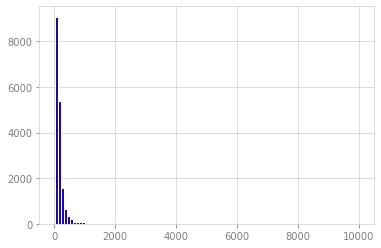

In [51]:
#Seeing distribution of listings price in histogram

data_listings.price.hist(bins=100, )

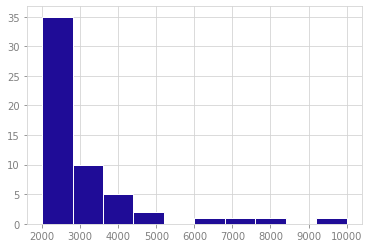

In [52]:
#seeing distibution of listings with a price above 2000
data_listings[data_listings.price>=2000].price.hist()

In [53]:
#inspecting distribution of listings in different price intervals
data_listings.price.value_counts(bins=10, normalize=True)

(0.009999999999999998, 1008.9]    0.986874
(1008.9, 2007.8]                  0.010591
(2007.8, 3006.7]                  0.001803
(3006.7, 4005.6]                  0.000394
(7002.3, 8001.2]                  0.000113
(4005.6, 5004.5]                  0.000113
(9000.1, 9999.0]                  0.000056
(6003.4, 7002.3]                  0.000056
(8001.2, 9000.1]                  0.000000
(5004.5, 6003.4]                  0.000000
Name: price, dtype: float64

In [54]:
#finding the 0.025 and 0.975 quantiles 
q_upper =data_listings.price.quantile(q=0.975)
q_lower = data_listings.price.quantile(q=0.025)

#printing the quantiles
print(f'q_upper: {q_upper}')
print(f'q_lower: {q_lower}')

#only keeping data between the lower and upper bounds
data_listings = data_listings[(data_listings.price>=q_lower) & (data_listings.price<=q_upper)]

q_upper: 749.25
q_lower: 33.0


In [55]:
#adding new column that calculates the price per room

data_listings['price_per_room']= data_listings.price / data_listings.bedrooms


In [56]:
data_listings.price_per_room

1         75.0
2        155.0
4         70.0
5         67.5
6         73.0
         ...  
30104     60.0
30270     70.0
30287    175.0
30289     83.0
30335    105.0
Name: price_per_room, Length: 16889, dtype: float64

# Removing Neighborhoods with under 25 occurenses

In [57]:
data_listings.neighborhood.value_counts()

Long Beach         1075
Venice              995
Hollywood           712
Santa Monica        583
Downtown            458
                   ... 
Green Meadows         1
Lake Hughes           1
Central-Alameda       1
Bell Gardens          1
Tujunga Canyons       1
Name: neighborhood, Length: 253, dtype: int64

In [58]:
data_listings=data_listings.loc[data_listings['neighborhood'].isin(data_listings.neighborhood.value_counts().index[data_listings.neighborhood.value_counts()>= 25])]



In [59]:
data_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15818 entries, 1 to 30335
Columns: 164 entries, id to price_per_room
dtypes: float64(23), int64(110), object(31)
memory usage: 19.9+ MB


# Exporting CSV to Google Drive

In [60]:
# Not relevant for external use:
# from google.colab import drive
#drive.mount('/content/drive')

In [61]:
# data_listings.to_csv('/content/drive/MyDrive/Cand.fælles/Data Science Projekt/For_github/data/airbnb_cleaned.csv',index=False)